Time of flight:       10.995 s
The range is:        182.54 m
Time of flight:        9.919 s
The range is:        182.08 m
Time of flight:        8.684 s
The range is:        253.73 m
Time of flight:        8.698 s
The range is:        242.02 m
Time of flight:        9.240 s
The range is:        185.27 m
Time of flight:        8.937 s
The range is:        200.38 m
Time of flight:        8.861 s
The range is:        180.68 m
Time of flight:        8.492 s
The range is:        177.50 m
Time of flight:        7.941 s
The range is:        260.43 m
Time of flight:        8.257 s
The range is:        226.68 m
Time of flight:        7.672 s
The range is:        222.16 m
Time of flight:        8.308 s
The range is:        166.44 m
Time of flight:        8.702 s
The range is:        105.78 m
Time of flight:        7.323 s
The range is:        181.47 m
Time of flight:        8.189 s
The range is:        156.90 m
Time of flight:        7.678 s
The range is:        156.39 m
Time of flight:        7

Time of flight:       10.337 s
The range is:        197.55 m
Time of flight:        7.901 s
The range is:        231.39 m
Time of flight:        5.184 s
The range is:        167.42 m
Time of flight:       10.487 s
The range is:        196.00 m
Time of flight:        9.110 s
The range is:        134.58 m
Time of flight:       11.100 s
The range is:        181.52 m
Time of flight:        5.494 s
The range is:        184.06 m
Time of flight:        9.201 s
The range is:        132.46 m
Time of flight:        7.053 s
The range is:        187.04 m
Time of flight:        7.986 s
The range is:        169.38 m
Time of flight:        9.652 s
The range is:        189.32 m
Time of flight:        7.945 s
The range is:        198.45 m
Time of flight:        9.096 s
The range is:        195.30 m
Time of flight:        8.495 s
The range is:        236.57 m
Time of flight:        7.829 s
The range is:        220.84 m
Time of flight:        8.164 s
The range is:        137.29 m
Time of flight:        8

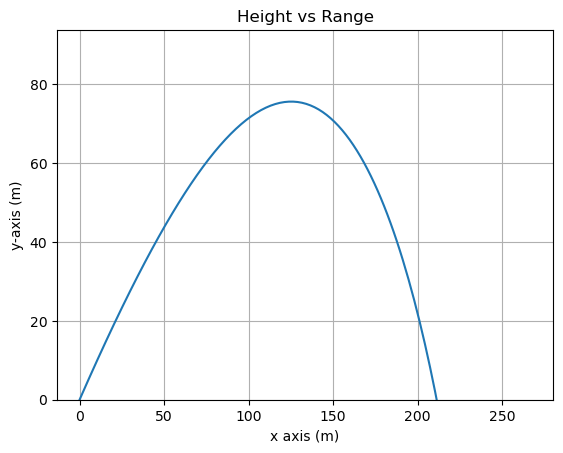

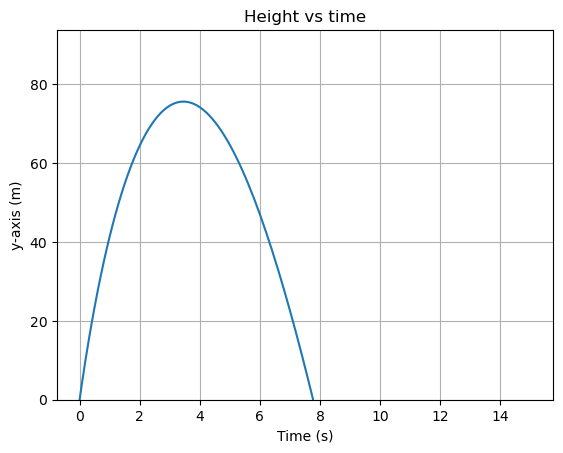

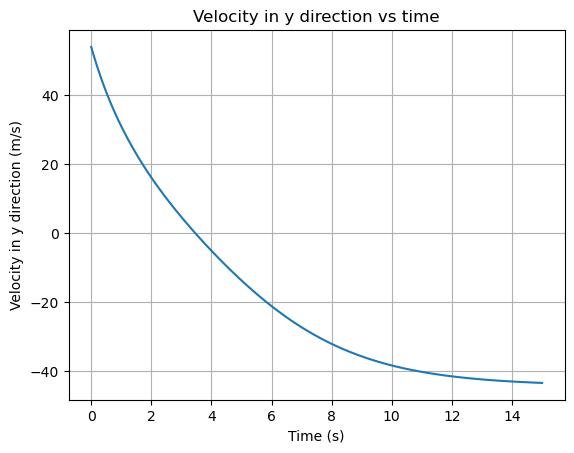

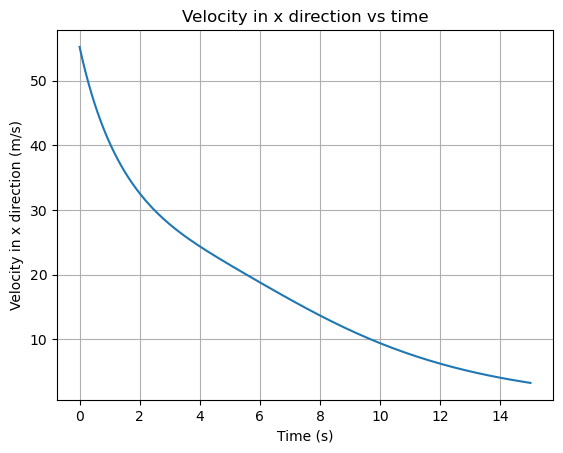

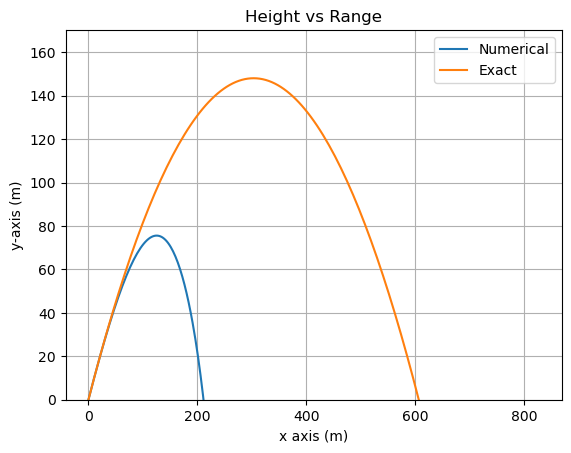

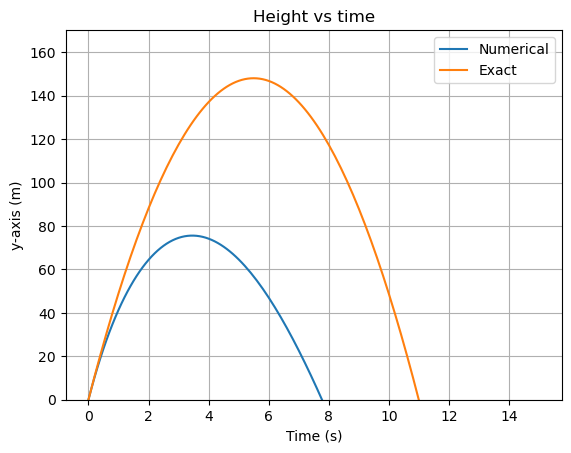

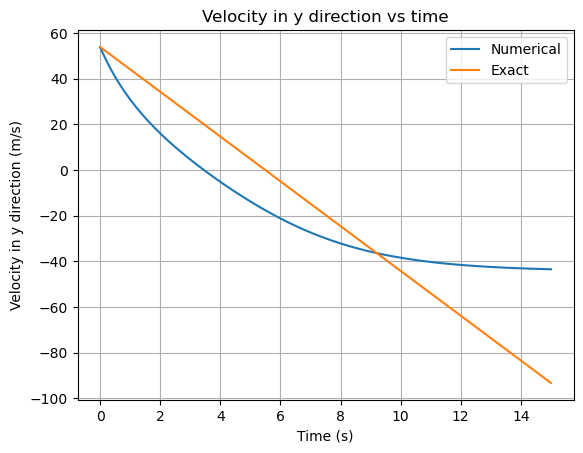

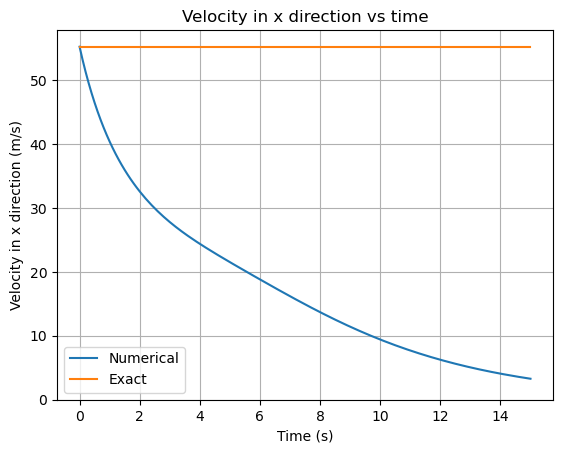

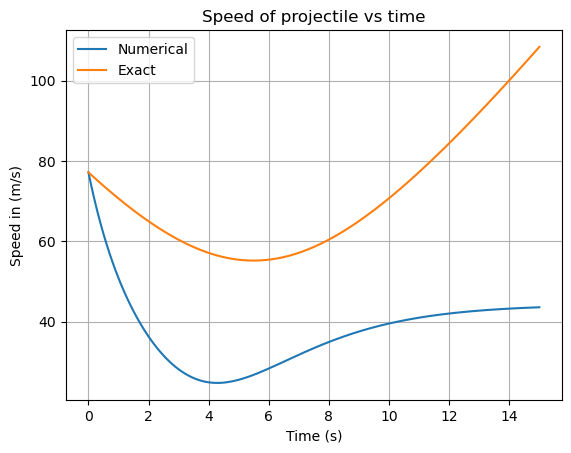

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import random

#  The numerical framework for solving general ODE systems is adopted from the book    
#  Jaan Kiusalaas, 2013, Numerical Methods in Engineering. Used in the course MAF310
# Chapter 7, page 246 -267


def main():
    
    t=0.0      # Starting time for simulation (sec)
    tend = 15  # End of simulation time (sec). Must be increased if projectile has not reached the ground.
  
    
    utfil=open('ballistiskedata.txt','w') 
    utfil.write('V0'+'\t'+'Ø'+'\t'+'Time'+'\t'+'R'+'\n')
    
    for i in range(300):
    
        # Random draw of initial speed and direction    
        v0 = random.uniform(60,100)
        anggrader = random.uniform(30,70)
        
        ang = anggrader*math.pi/180  # Converted to radians 
    
        # Note that the wind is now specified here and sent into the functions.
        #w = random.uniform(-5,5)
        w=0
    
        y=np.array([0,v0*math.sin(ang),0,v0*math.cos(ang)])  # Initial conditions where the vx and vy are defined + +
        dt =0.1  # Timestep
        T,Y=integrate_rungk4(F,t,y,tend,dt,w)  # Integrates forward using Runge Kutta 4th order in time!
        #T,Y=integrate_euler(F,t,y,tend,dt)
    

        T1,Y1=exact_solution(v0,ang,y,t,tend,dt)
    
  #  printSoln(T,Y,1)
    
        flighttime,distance=findRange(T,Y)
        print(f'Time of flight: {flighttime:12.3f} s')
        print("The range is: ",format(distance,'12.2f'), 'm')
    
        
    
        utfil.write(str(format(v0,'.2f'))+'\t' + \
                str(format(anggrader,'.1f'))+'\t'+\
                str(format(flighttime,'.2f'))+'\t'+\
                str(format(distance,'.2f'))+'\n')
    
    utfil.close()
    
    
    plt.plot(Y[:,2],Y[:,0])
    plt.grid(True)
    plt.xlabel('x axis (m)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs Range')
    plt.show()
    
    
    plt.plot(T,Y[:,0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs time')
    plt.show()
    
    plt.plot(T,Y[:,1])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in y direction (m/s)')
    plt.title('Velocity in y direction vs time')
    plt.show() 
    
    plt.plot(T,Y[:,3])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in x direction (m/s)')
   # plt.ylim(ymin=0)
    plt.title('Velocity in x direction vs time')
    plt.show()  

    
    
    # Here comes comparison plot with the exact solution

    plt.plot(Y[:,2],Y[:,0],Y1[:,2],Y1[:,0])
    plt.grid(True)
    plt.xlabel('x axis (m)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs Range')
    plt.legend(['Numerical','Exact'])
    plt.show()
    
    
    plt.plot(T,Y[:,0],T1,Y1[:,0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs time')
    plt.legend(['Numerical','Exact'])
    plt.show()
    
    
    plt.plot(T,Y[:,1],T1,Y1[:,1])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in y direction (m/s)')
    plt.title('Velocity in y direction vs time')
    plt.legend(['Numerical','Exact'])
    plt.show() 
    
    plt.plot(T,Y[:,3],T1,Y1[:,3])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in x direction (m/s)')
    plt.ylim(ymin=0)
    plt.title('Velocity in x direction vs time')
    plt.legend(['Numerical','Exact'])
    plt.show() 
    
        
    plt.plot(T,(Y[:,3]**2+Y[:,1]**2)**0.5,T1,(Y1[:,3]**2+Y1[:,1]**2)**0.5)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Speed in (m/s)')
 #   plt.ylim(ymin=0)
    plt.title('Speed of projectile vs time')
    plt.legend(['Numerical','Exact'])
    plt.show()  
    
    
    
    
def exact_solution(v0,ang,y,t,tend,dt):
    T=[]
    Y=[]
    
    T.append(t)
    Y.append(y)


    g=9.81
    
    y=np.zeros(4)
    while(t<tend):
        dt=min(dt,tend-t)
        t=t+dt
        y = y+0; ## NB! Denne var viktig for å få det hele til å fungere.
        # Uten denne så virker det som bare den siste verdien blir lagret
        # i arrayen til slutt. Må ha med det spesielle i Python hvordan 
        # lister/arrays skal kopieres i Python
        
        y[0]=v0*math.sin(ang)*t-0.5*g*t**2
        y[1]=v0*math.sin(ang)-g*t
        y[2]=v0*math.cos(ang)*t
        y[3]=v0*math.cos(ang)
        T.append(t)
        Y.append(y)
      #  print(Y)
          
    return np.array(T),np.array(Y)

    
    
    
def integrate_euler(F,t,y,tend,dt):
    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    while(t<tend):
        dt=min(dt,tend-t)
        y=y+dt*F(t,y)
        t=t+dt
        T.append(t)
        Y.append(y)
    return np.array(T),np.array(Y)


def integrate_rungk4(F,t,y,tend,dt,w):
    
    # a general function that applies 4th order RungeKutta
    
    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    while t<tend:
        dt=min(dt,tend-t)
        y=y + run_kut4(F,t,y,dt,w)
        t=t+dt
        T.append(t)
        Y.append(y)
    return np.array(T),np.array(Y)


def run_kut4(F,x,y,h,w):
  #  4th order Runge Kutta Method 
  # Do not have to change this
    K0=h*F(x,y,w)
    K1=h*F(x+0.5*h,y+0.5*K0,w)
    K2=h*F(x+0.5*h,y+0.5*K1,w)
    K3=h*F(x+h,y+K2,w)
    
    return (K0+2*K1+2*K2+K3)/6.0


def F(t,y,w):
    # This is the function that must be changed when switching between different ordinary differential equations 
    
    Cd=0.01
    m=2
    g=9.81
  
    
    F=np.zeros(4)
    
     #  Air drag proportional to v^2 + wind
    F[0]=y[1]
    F[1]=-Cd/m*y[1]*((y[1]**2+(y[3]-w)**2)**0.5)-g
    F[2]=y[3]
    F[3]=-Cd/m*(y[3]-w)*((y[1]**2+(y[3]-w)**2)**0.5)
    
    return F


def findRange(T,Y):
     
    last = len(Y[:,0])
    
    if(Y[last-1,0])>=0:
        print('Projectile has not reached ground, Increase end simulation time')  
        return 0,0 
    
    else:
        indeks = 0
    
        while Y[indeks,0]>=0:
            save = Y[indeks,0] 
            indeks = indeks +1
    
        slope = (Y[indeks,0]-Y[indeks-1,0])/(T[indeks]-T[indeks-1])
        Timpact = T[indeks-1]-Y[indeks-1,0]/slope    
    
        xint=(Timpact-T[indeks-1])/(T[indeks]-T[indeks-1])
    #print(xint)
        Range = (1-xint)*Y[indeks-1,2]+xint*Y[indeks,2]
    
        return Timpact,Range 
    



def printSoln(X,Y,freq):
    m=len(Y)
    
    try: n=len(Y[0])
    except Typeerror: n=1
    
    if freq==0:
        freq=m
    printHead(n)
    
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)

def printHead(n):
    print("\n    x  ",end=" ")
    for i in range(n):
        print("     y[",i,"]  ",end=" ")
    
    print()
    
def printLine(x,y,n):
    print(format(x,'13.4e'),end=" ")
    for i in range(n):
        print(format(y[i],'13.4e'),end=" ")
    print()    
    
main()    
    